# Testing for File Permanence and Human Yes/No interface

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv

from structgeo.model import geo
from structgeo.model import plot as geovis
from structgeo.model import history as geohistory
import structgeo.probability as rv

import importlib

pv.set_jupyter_backend('static')

In [2]:
def reloader():
    importlib.reload(geo)
    importlib.reload(geovis)
    importlib.reload(geohistory)
    importlib.reload(rv)
reloader()

## Goal:
Make an interaface that will present generated models with a yes/no decision to save the model

In [3]:
# Set random seed for reproducibility
# random_seed = 1234
# np.random.seed(random_seed)

In [4]:
# Start with some model specifications
resolution = 128
# Cubic model keeps 
max_x = 10
min_x = - max_x
model_size = max_x - min_x
bounds = (min_x,max_x)
model = geo.GeoModel(bounds, resolution)
print(f"Model created with bounds {bounds} and resolution {resolution}")

Model created with bounds (-10, 10) and resolution 128


In [5]:

# Bedrock# random bedrock in lower 1/4 of model
base = min_x + model_size / 5 + np.random.normal(0, model_size / 10)
value = 0
bedrock = geo.Bedrock(base,value)
print(f"Bedrock defined at {base} with value {value}")

# Random sedimentary layer filled to around 1/2 of the model
height = base + model_size / 3 + np.random.normal(0, model_size / 10)
height = max(height, base + model_size/10)
avg_thickness = (height-base)/10
print(f"Average thickness of sedimentary layer is {avg_thickness}")
def thickness():
    return np.random.lognormal(np.log(avg_thickness),1)
sediment = geo.Sedimentation(height=height, value_list = range(1,100) , thickness_callable = thickness)
print(f"Sedimentary layer defined at {height} with values {sediment.value_list}")

Bedrock defined at -2.056373460951754 with value 0
Average thickness of sedimentary layer is 0.4838941582568842
Sedimentary layer defined at 2.7825681216170883 with values range(1, 100)


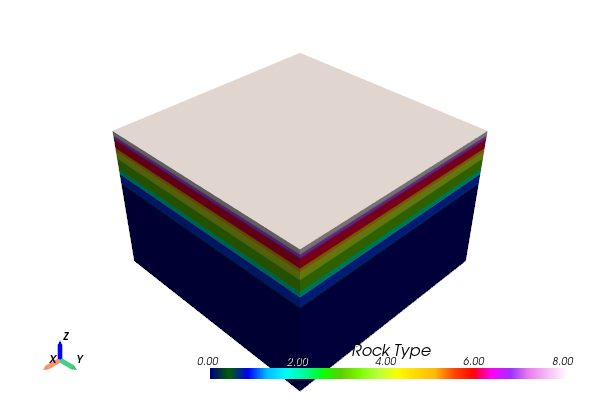

In [6]:

importlib.reload(geovis)

model.clear_history()
model.add_history([bedrock,sediment])
model.compute_model()
p = geovis.volview(model)
p.show(window_size=[600,400])


In [7]:

from structgeo.data.file_manager import FileManager
DEFAULT_BASE_DIR = "../saved_models"
fm = FileManager(DEFAULT_BASE_DIR)

fm.save_history_models([model], lean=True)

# models = fm.load_history_models()[0]

Model saved to ../saved_models\model_19.pkl


Model loaded from ../saved_models\model_0.pkl
Model loaded from ../saved_models\model_1.pkl
Model loaded from ../saved_models\model_10.pkl
Model loaded from ../saved_models\model_11.pkl
Model loaded from ../saved_models\model_12.pkl
Model loaded from ../saved_models\model_13.pkl
Model loaded from ../saved_models\model_14.pkl
Model loaded from ../saved_models\model_15.pkl
Model loaded from ../saved_models\model_16.pkl
Model loaded from ../saved_models\model_17.pkl
Model loaded from ../saved_models\model_18.pkl
Model loaded from ../saved_models\model_19.pkl
Model loaded from ../saved_models\model_2.pkl
Model loaded from ../saved_models\model_3.pkl
Model loaded from ../saved_models\model_4.pkl
Model loaded from ../saved_models\model_5.pkl
Model loaded from ../saved_models\model_6.pkl
Model loaded from ../saved_models\model_7.pkl
Model loaded from ../saved_models\model_8.pkl
Model loaded from ../saved_models\model_9.pkl


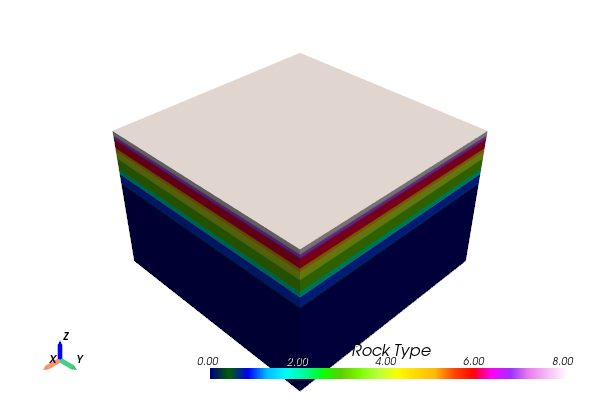

In [8]:
models = fm.load_history_models()
m = models[0]
m.compute_model()
geovis.volview(m).show(window_size=[600,400])

In [9]:
from structgeo.data.model_reviewer import ModelReviewer

DEFAULT_BASE_DIR = "../saved_models"

avg_thickness = (height-base)/10
def thickness():
    return np.random.lognormal(np.log(avg_thickness), 1)

def generate_model():
    # Place the model generation logic here
    base = min_x + model_size / 5 + np.random.normal(0, model_size / 10)
    height = base + model_size / 3 + np.random.normal(0, model_size / 10)
    height = max(height, base + model_size/10)
    
    bedrock = geo.Bedrock(base, 0)
    sediment = geo.Sedimentation(height, list(range(1, 100)), thickness_callable=thickness)
    model.clear_history()
    model.add_history([bedrock, sediment])
    model.compute_model()
    return model


reviewer = ModelReviewer(generate_model_func=generate_model, base_dir=DEFAULT_BASE_DIR)
reviewer.start_review()

Output()

Model discarded.


Model discarded.


Model saved to ../saved_models\model_20.pkl
Model saved!


Model saved to ../saved_models\model_21.pkl
Model saved!


Model saved to ../saved_models\model_22.pkl
Model saved!


Model saved to ../saved_models\model_23.pkl
Model saved!


Model saved to ../saved_models\model_24.pkl
Model saved!


In [10]:
# import ipywidgets as widgets
# import pyvista as pv
# from IPython.display import display, clear_output
# import numpy as np

# avg_thickness = (height-base)/10
# def thickness():
#     return np.random.lognormal(np.log(avg_thickness), 1)

# def generate_model():
#     # Place the model generation logic here
#     base = min_x + model_size / 5 + np.random.normal(0, model_size / 10)
#     height = base + model_size / 3 + np.random.normal(0, model_size / 10)
#     height = max(height, base + model_size/10)
    
#     bedrock = geo.Bedrock(base, 0)
#     sediment = geo.Sedimentation(height, list(range(1, 100)), thickness_callable=thickness)
       
#     model.clear_history()
#     model.add_history([bedrock, sediment])
#     model.compute_model()
#     return model

# def plot_model(model, plotter, output):
#     with output:
#         clear_output(wait=True)
#         if hasattr(plotter, 'last_mesh'):
#             plotter.remove_actor(plotter.last_mesh)  # Remove the last mesh if it exists

#         mesh = geovis.get_mesh_from_model(model)  # Assume this method exists
#         color_config = geovis.get_color_config()  # Assume this returns a dictionary with config

#         # Add the new mesh and store the actor in the plotter for next update
#         plotter.last_mesh = plotter.add_mesh(mesh, scalars="values", **color_config)
#         plotter.show(window_size=[600, 400])

# def interactive_model_review():
#     output = widgets.Output()  # To manage dynamic display updates
#     plotter = pv.Plotter()  # Create a plotter to display the model 
#     _ = plotter.add_axes(line_width=5)
#     display(output)

#     def refresh_model():
#         with output:
#             clear_output(wait=True)
#             model = generate_model()
#             plot_model(model, plotter, output)  # Pass the plotter to the plot_model
#             display_buttons(model)

#     def save_action(b):
#         fm = FileManager(base_dir="../saved_models")  # Ensure FileManager is defined
#         fm.save_geo_model(model)
#         print("Model saved!")
#         refresh_model()

#     def discard_action(b):
#         print("Model discarded.")
#         refresh_model()

#     def display_buttons(model):
#         save_button = widgets.Button(description="Save Model")
#         discard_button = widgets.Button(description="Discard Model")
#         save_button.on_click(save_action)
#         discard_button.on_click(discard_action)
#         button_box = widgets.HBox([save_button, discard_button])
#         display(button_box)

#     refresh_model()  # Initialize the first model

# interactive_model_review()

Output()